In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_csv(file):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file, sep='\t')
    df = df.sort_values(by='filename')

    # Convert 'start' to numeric, forcing invalid parsing to NaN, then drop NaNs
    df['start'] = pd.to_numeric(df['start'], errors='coerce')
    df = df.dropna(subset=['start'])
    df['start'] = df['start'].astype(int)

    # Extract the first part of the filename before the first underscore "_"
    df['filename'] = df['filename'].apply(lambda x: x.split('_')[0])

    # Sort the DataFrame by 'filename' and then by 'start'
    df = df.sort_values(by=['filename', 'start'])
    return df

def average_methylation_pct(df):
    # Filter the DataFrame to include only rows with 'pct_methylation' greater than 3
    df_avg = df[df['pct_methylation'] > 3]
    
    # If negative controls are not wanted for visualization
    #df_avg.drop(df_avg[df_avg['pct_methylation'] == 0].index, inplace=True)
    
    # Group by 'filename' and calculate the average 'pct_methylation' for each group
    df_avg = df_avg.groupby('filename', as_index=False)['pct_methylation'].mean()

    # Sort the DataFrame by 'filename'
    df_avg = df_avg.sort_values(by='filename')
    
    df_avg['pct_methylation'] = df_avg.pct_methylation.fillna(0)
    return df_avg

def main():
    df = input('Enter name of file to analyze: ')
    df = load_csv(df)

    custom_label = input('Enter custom labels for conditions as a list separated by commas: ').split(',')
    
    # Define custom manual changes to the 'filename' column
    for i in range(0, len(custom_label)):
        df.loc[df['filename'] == 'Condition' + str(i), 'filename'] = custom_label[i]
        
    df['filename'] = pd.Categorical(df['filename'], categories=custom_label, ordered=True)
    
    df_avg = average_methylation_pct(df)

In [2]:
main()

Enter name of file to analyze: combined_output.tsv
Enter custom labels for conditions as a list separated by commas: 1ng_10mM-Mg_5mM-ATP_1uL-pol6,10ng_10mM-Mg_5mM-ATP_1uL-pol6,1ng_10mM-Mg_10mM-ATP_1uL-pol6,10ng_10mM-Mg_10mM-ATP_1uL-pol6,1ng_15mM-Mg_10mM-ATP_1uL-pol6,10ng_15mM-Mg_10mM-ATP_1uL-pol6,1ng_10mM-Mg_15mM-ATP_1uL-pol6,10ng_10mM-Mg_15mM-ATP_1uL-pol6,1ng_15mM-Mg_15mM-ATP_1uL-pol6,10ng_15mM-Mg_15mM-ATP_1uL-pol6,1ng_20mM-Mg_15mM-ATP_1uL-pol6,10ng_20mM-Mg_15mM-ATP_1uL-pol6,1ng_10mM-Mg_5mM-ATP_2uL-pol6,10ng_10mM-Mg_5mM-ATP_2uL-pol6,MethControl


In [4]:
df

NameError: name 'df' is not defined

In [3]:
df_avg

NameError: name 'df_avg' is not defined

In [5]:
df = input('Enter name of file to analyze: ')
df = load_csv(df)

custom_label = input('Enter custom labels for conditions as a list separated by commas: ').split(',')

Enter name of file to analyze: combined_output.tsv
Enter custom labels for conditions as a list separated by commas: 1ng_10mM-Mg_5mM-ATP_1uL-pol6,10ng_10mM-Mg_5mM-ATP_1uL-pol6,1ng_10mM-Mg_10mM-ATP_1uL-pol6,10ng_10mM-Mg_10mM-ATP_1uL-pol6,1ng_15mM-Mg_10mM-ATP_1uL-pol6,10ng_15mM-Mg_10mM-ATP_1uL-pol6,1ng_10mM-Mg_15mM-ATP_1uL-pol6,10ng_10mM-Mg_15mM-ATP_1uL-pol6,1ng_15mM-Mg_15mM-ATP_1uL-pol6,10ng_15mM-Mg_15mM-ATP_1uL-pol6,1ng_20mM-Mg_15mM-ATP_1uL-pol6,10ng_20mM-Mg_15mM-ATP_1uL-pol6,1ng_10mM-Mg_5mM-ATP_2uL-pol6,10ng_10mM-Mg_5mM-ATP_2uL-pol6,MethControl


In [ ]:
    file = input('Enter name of file to analyze: ')
    load_csv(df)

    custom_label = input('Enter custom labels for conditions as a list separated by commas: ')
    
    # Define custom manual changes to the 'filename' column
    for i, condition in enumerate(custom_label):
        print("{}: {}".format(i + 1, condition))

In [ ]:
len(custom_label)

In [6]:
for i in range(0, len(custom_label)):
    df.loc[df['filename'] == 'Condition' + str(i), 'filename'] = custom_label[i]

In [7]:
df

,filename,chrom,start,end,pct_methylation,num_alignment_methylated,num_alignment_unmethylated
130,10ng_10mM-Mg_5mM-ATP_1uL-pol6,sequence_1,4,5,0,209,24781
131,10ng_10mM-Mg_5mM-ATP_1uL-pol6,sequence_1,5,6,1,202,15837
132,10ng_10mM-Mg_5mM-ATP_1uL-pol6,sequence_1,18,19,75,90356,29616
133,10ng_10mM-Mg_5mM-ATP_1uL-pol6,sequence_1,19,20,75,96586,31556
134,10ng_10mM-Mg_5mM-ATP_1uL-pol6,sequence_1,38,39,0,1674,170458
...,...,...,...,...,...,...,...
385,MethControl,sequence_1,106,107,94,191868,10118
386,MethControl,sequence_1,128,129,0,292,139568
387,MethControl,sequence_1,129,130,0,358,186577
388,MethControl,sequence_1,142,143,0,263,127284


In [ ]:
# Define custom manual changes to the 'filename' column
for i in range(0, len(custom_label)):
    print("{}: {}".format(i + 1, custom_label[i]))

In [ ]:
for i, condition in enumerate(custom_label):
    print("{}: {}".format(i + 1, condition))

In [ ]:
len(custom_label)

In [ ]:
df['filename'].unique()[0]

In [ ]:
def hue_selection_ui(df):
    anno_names = df.columns
    for i, name in enumerate(anno_names):
        print("{}: {}".format(i + 1, name))
    hue_selection = input("\n\nPlease enter number specifying the annotation to use "
                          "as hue condition: ")
    hue = anno_names[int(hue_selection) - 1]

    return hue


def order_hue_ui(df, hue):
    unique_conditions = sorted(df[hue].unique().tolist())
    print("FOUND {} HUE CONDITIONS".format(len(unique_conditions)))
    for i, condition in enumerate(unique_conditions):
        print("{}: {}".format(i + 1, condition))
    order_indices = input("\n\nPlease enter string of numbers separated "
                          "by spaces (i.e. 1 3 2 5 6 4) specifying the "
                          "order in which to plot: ")
    order = [unique_conditions[int(j) - 1] for j in order_indices.split()]

    return order

In [ ]:
1ng_10mM-Mg_5mM-ATP_1uL-pol6,10ng_10mM-Mg_5mM-ATP_1uL-pol6,1ng_10mM-Mg_10mM-ATP_1uL-pol6,10ng_10mM-Mg_10mM-ATP_1uL-pol6,1ng_15mM-Mg_10mM-ATP_1uL-pol6,10ng_15mM-Mg_10mM-ATP_1uL-pol6,1ng_10mM-Mg_15mM-ATP_1uL-pol6,10ng_10mM-Mg_15mM-ATP_1uL-pol6,1ng_15mM-Mg_15mM-ATP_1uL-pol6,10ng_15mM-Mg_15mM-ATP_1uL-pol6,1ng_20mM-Mg_15mM-ATP_1uL-pol6,10ng_20mM-Mg_15mM-ATP_1uL-pol6,1ng_10mM-Mg_5mM-ATP_2uL-pol6,10ng_10mM-Mg_5mM-ATP_2uL-pol6,MethControl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('combined_output.tsv', sep='\t')
df = df.sort_values(by='filename')

# Convert 'start' to numeric, forcing invalid parsing to NaN, then drop NaNs
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df = df.dropna(subset=['start'])
df['start'] = df['start'].astype(int)

# Extract the first part of the filename before the first underscore "_"
df['filename'] = df['filename'].apply(lambda x: x.split('_')[0])

# Sort the DataFrame by 'filename' and then by 'start'
df = df.sort_values(by=['filename', 'start'])

df

In [ ]:
df.filename.unique()

In [ ]:
df.to_csv("up.csv")

In [10]:
# Define custom order list for filenames
custom_order = ['1ng_10mM-Mg_5mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_5mM-ATP_1uL-pol6', 
                '1ng_10mM-Mg_10mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_10mM-ATP_1uL-pol6', 
                '1ng_15mM-Mg_10mM-ATP_1uL-pol6', 
                '10ng_15mM-Mg_10mM-ATP_1uL-pol6',
                '1ng_10mM-Mg_15mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_15mM-ATP_1uL-pol6', 
                '1ng_15mM-Mg_15mM-ATP_1uL-pol6',  
                '10ng_15mM-Mg_15mM-ATP_1uL-pol6', 
                '1ng_20mM-Mg_15mM-ATP_1uL-pol6', 
                '10ng_20mM-Mg_15mM-ATP_1uL-pol6',
                '1ng_10mM-Mg_5mM-ATP_2uL-pol6', 
                '10ng_10mM-Mg_5mM-ATP_2uL-pol6', 
                'MethControl']  # Replace with your custom order

In [ ]:
# Define custom manual changes to the 'filename' column
df.loc[df['filename'] == 'Condition1', 'filename'] = '1ng_10mM-Mg_5mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition2', 'filename'] = '10ng_10mM-Mg_5mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition3', 'filename'] = '1ng_10mM-Mg_10mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition4', 'filename'] = '10ng_10mM-Mg_10mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition5', 'filename'] = '1ng_15mM-Mg_10mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition6', 'filename'] = '10ng_15mM-Mg_10mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition7', 'filename'] = '1ng_10mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition8', 'filename'] = '10ng_10mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition9', 'filename'] = '1ng_15mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition10', 'filename'] = '10ng_15mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition11', 'filename'] = '1ng_20mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition12', 'filename'] = '10ng_20mM-Mg_15mM-ATP_1uL-pol6'
df.loc[df['filename'] == 'Condition13', 'filename'] = '1ng_10mM-Mg_5mM-ATP_2uL-pol6'
df.loc[df['filename'] == 'Condition14', 'filename'] = '10ng_10mM-Mg_5mM-ATP_2uL-pol6'

In [ ]:
for i in df_avg.filename.unique():
    print(i)

In [14]:
# Convert 'filename' to a categorical type with the custom order
df['filename'] = pd.Categorical(df['filename'], categories=custom_order, ordered=True)

In [ ]:
# Define all potential categories, including the modified ones
all_categories = [
    'Condition1', 'Condition10', 'Condition11', 'Condition12',
       'Condition13', 'Condition14', 'Condition2', 'Condition3',
       'Condition4', 'Condition5', 'Condition6', 'Condition7',
       'Condition8', 'Condition9', 'MethControl', 
'1ng_10mM-Mg_5mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_5mM-ATP_1uL-pol6', 
                '1ng_10mM-Mg_10mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_10mM-ATP_1uL-pol6', 
                '1ng_15mM-Mg_10mM-ATP_1uL-pol6', 
                '10ng_15mM-Mg_10mM-ATP_1uL-pol6',
                '1ng_10mM-Mg_15mM-ATP_1uL-pol6', 
                '10ng_10mM-Mg_15mM-ATP_1uL-pol6', 
                '1ng_15mM-Mg_15mM-ATP_1uL-pol6',  
                '10ng_15mM-Mg_15mM-ATP_1uL-pol6', 
                '1ng_20mM-Mg_15mM-ATP_1uL-pol6', 
                '10ng_20mM-Mg_15mM-ATP_1uL-pol6',
                '1ng_10mM-Mg_5mM-ATP_2uL-pol6', 
                '10ng_10mM-Mg_5mM-ATP_2uL-pol6'
]

# Convert 'filename' to a categorical type with all potential categories
df['filename'] = pd.Categorical(df['filename'], categories=all_categories, ordered=True)

df.drop(df[df['filename'] == '39C_NoSAM_NoATP_NoDNMT5_14mMMgOAc'].index, inplace=True)

In [8]:
df.filename.unique()

array(['10ng_10mM-Mg_5mM-ATP_1uL-pol6', '1ng_20mM-Mg_15mM-ATP_1uL-pol6',
       '10ng_20mM-Mg_15mM-ATP_1uL-pol6', '1ng_10mM-Mg_5mM-ATP_2uL-pol6',
       '10ng_10mM-Mg_5mM-ATP_2uL-pol6', 'MethControl',
       '1ng_10mM-Mg_10mM-ATP_1uL-pol6', '10ng_10mM-Mg_10mM-ATP_1uL-pol6',
       '1ng_15mM-Mg_10mM-ATP_1uL-pol6', '10ng_15mM-Mg_10mM-ATP_1uL-pol6',
       '1ng_10mM-Mg_15mM-ATP_1uL-pol6', '10ng_10mM-Mg_15mM-ATP_1uL-pol6',
       '1ng_15mM-Mg_15mM-ATP_1uL-pol6', '10ng_15mM-Mg_15mM-ATP_1uL-pol6'],
      dtype=object)

/var/folders/v4/4s99h7vn19nb0t_g7m2ync9m0000gn/T/ipykernel_23179/762208541.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', len(grouped))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1500 with 0 Axes>

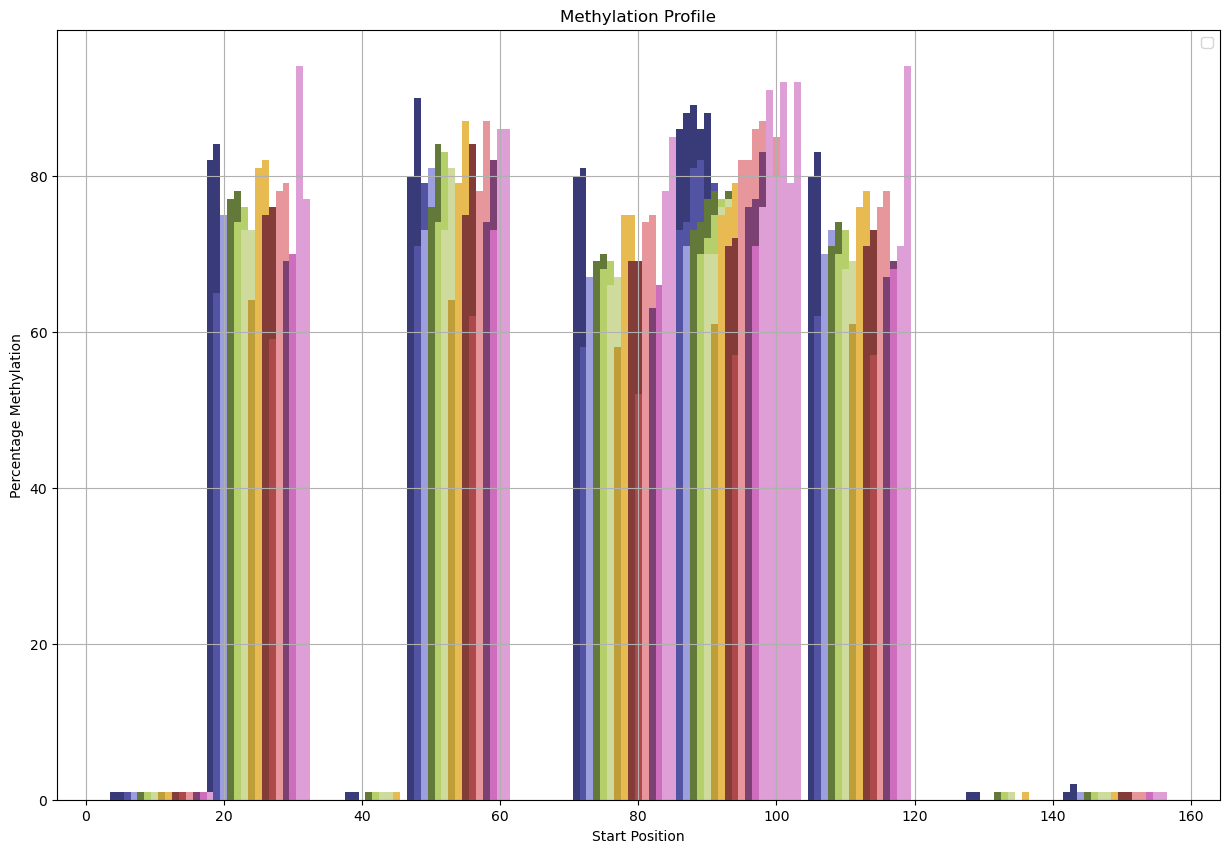

Plots have been generated and saved as Combined_Methylation_Profile_Simple.png.


In [11]:
# Get unique sorted start positions and convert them to integers and then to strings for categorical plotting
unique_starts = df['start'].unique().astype(str)

# Group data by 'filename'
grouped = df.groupby('filename')

# Create a new figure
plt.figure(figsize=(20, 15))

# Define colors for different groups using the updated method
colormap = plt.get_cmap('tab20b')
colors = [colormap(i) for i in range(len(grouped))]

# Create a new figure
plt.figure(figsize=(15, 10))

# Define colors for different groups
colors = plt.cm.get_cmap('tab20b', len(grouped))

# Set the bar width
bar_width = 1

# List of filenames to exclude from the legend

# Plot each group
for i, (filename, group) in enumerate(grouped):
    plt.bar(group['start'] + i * bar_width, group['pct_methylation'], width=bar_width, label=filename if filename not in custom_order else "", color=colors(i))

# Add title and labels
plt.title('Methylation Profile')
plt.xlabel('Start Position')
plt.ylabel('Percentage Methylation')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('Combined_Methylation_Profile_Simple.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Combined_Methylation_Profile_Simple.png.")

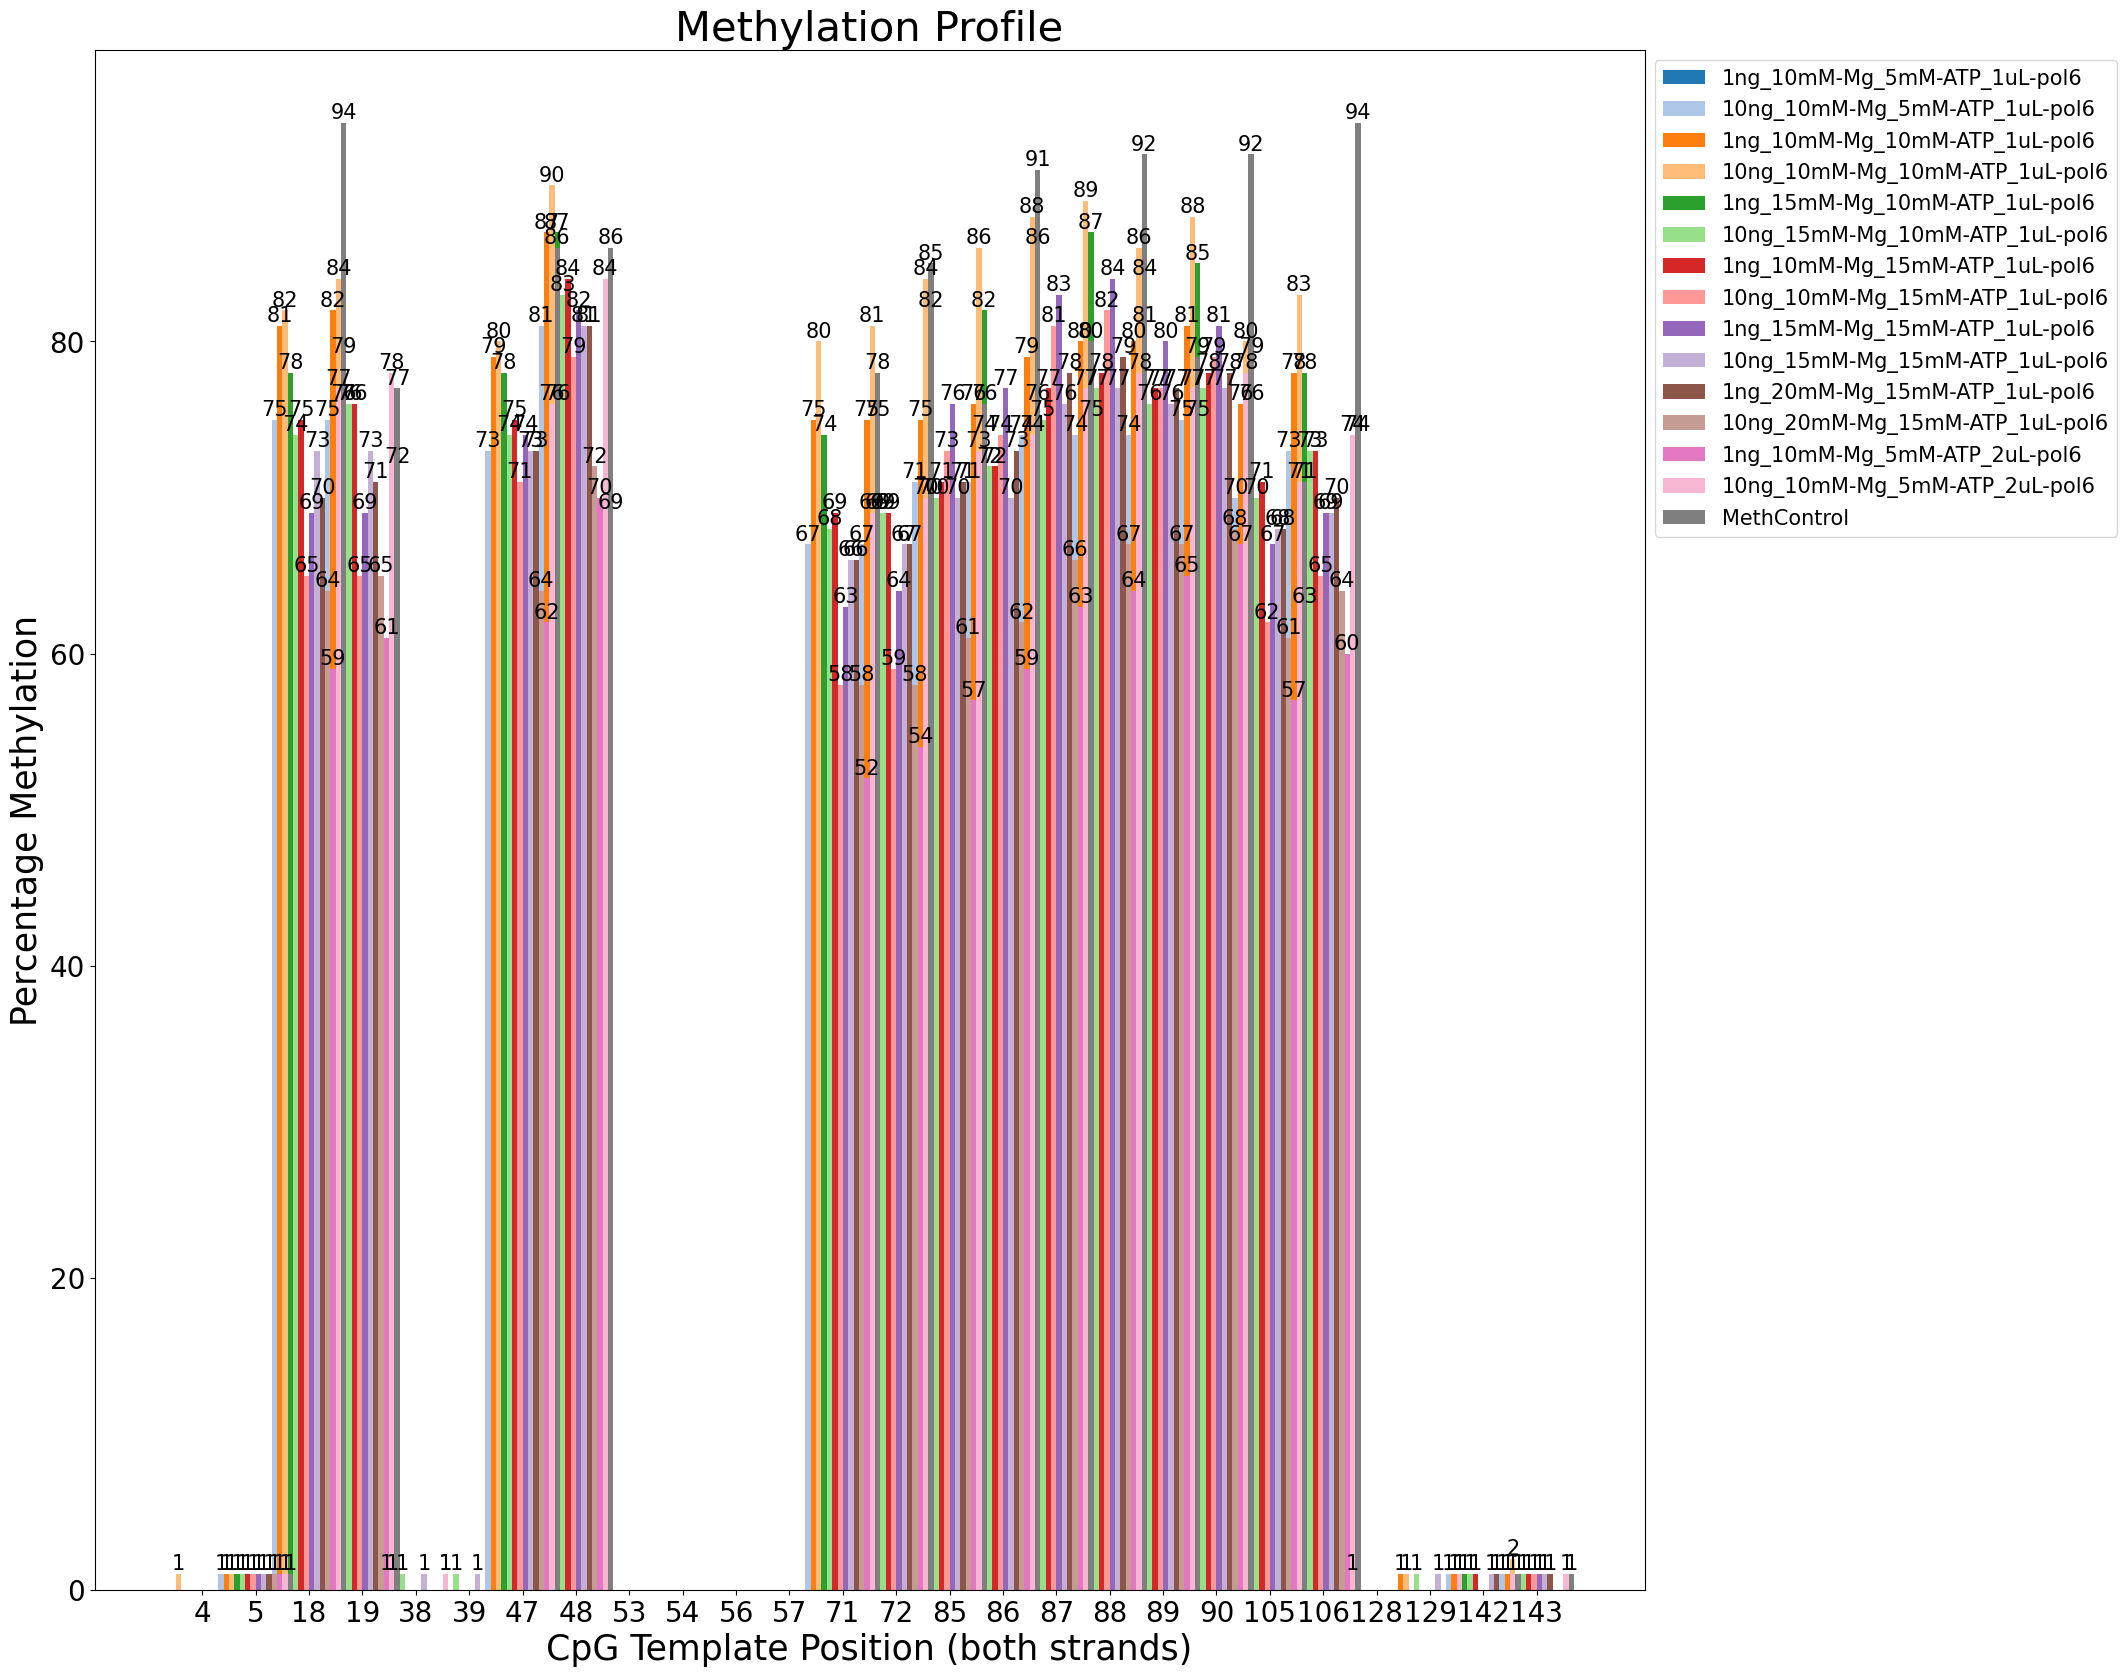

Plots have been generated and saved as Combined_Methylation_Profile_Labelled.png.


In [18]:
# Get unique sorted start positions and convert them to integers and then to strings for categorical plotting
unique_starts = df['start'].unique().astype(str)

# Group data by 'filename'
grouped = df.groupby('filename')

# Create a new figure
plt.figure(figsize=(20, 20))

# Define colors for different groups using the updated method
colormap = plt.get_cmap('tab20')
colors = [colormap(i) for i in range(len(grouped))]

# Set the bar width and the spacing between group sets
bar_width = 0.1
spacing_between_groups = .00002

# Calculate the positions for the bars on the x-axis
x_positions = np.arange(len(unique_starts)) * (1 + spacing_between_groups)

# Number of groups
num_groups = len(grouped)

# Plot each group
for i, (filename, group) in enumerate(grouped):
    # Get the indices for the x positions based on the unique start positions
    indices = [np.where(unique_starts == str(start))[0][0] for start in group['start']]
    # Centering the bars by shifting them left by half of total bar width and adding spacing
    shifted_indices = [x + (i - num_groups / 2) * bar_width for x in indices]
    bars = plt.bar(shifted_indices, group['pct_methylation'], width=bar_width, label=filename, color=colors[i])

    for j, bar in enumerate(bars):
        height = bar.get_height()
        start_pos = group['start'].iloc[j]
        # Add the percentage text without decimal points
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{int(height)}',  # Convert height to an integer for no decimal points
                ha='center',
                va='bottom',
                size=15
        )

# Add vertical lines to separate each start position
#for pos in x_positions:
#    plt.axvline(x=pos - .25 + bar_width, color='gray', linestyle='-.', linewidth=1)  # Adjusting position of vertical lines

# Add title and labels with larger font sizes
plt.title('Methylation Profile', fontsize=30)
plt.xlabel('CpG Template Position (both strands)', fontsize=25)
plt.ylabel('Percentage Methylation', fontsize=25)

# Set x-axis ticks as integers and adjust fontsize
plt.xticks(x_positions, unique_starts, rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Place legend outside the plot with larger font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)

# Save the plot as an image file
plt.savefig('Combined_Methylation_Profile_Labelled.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Combined_Methylation_Profile_Labelled.png.")

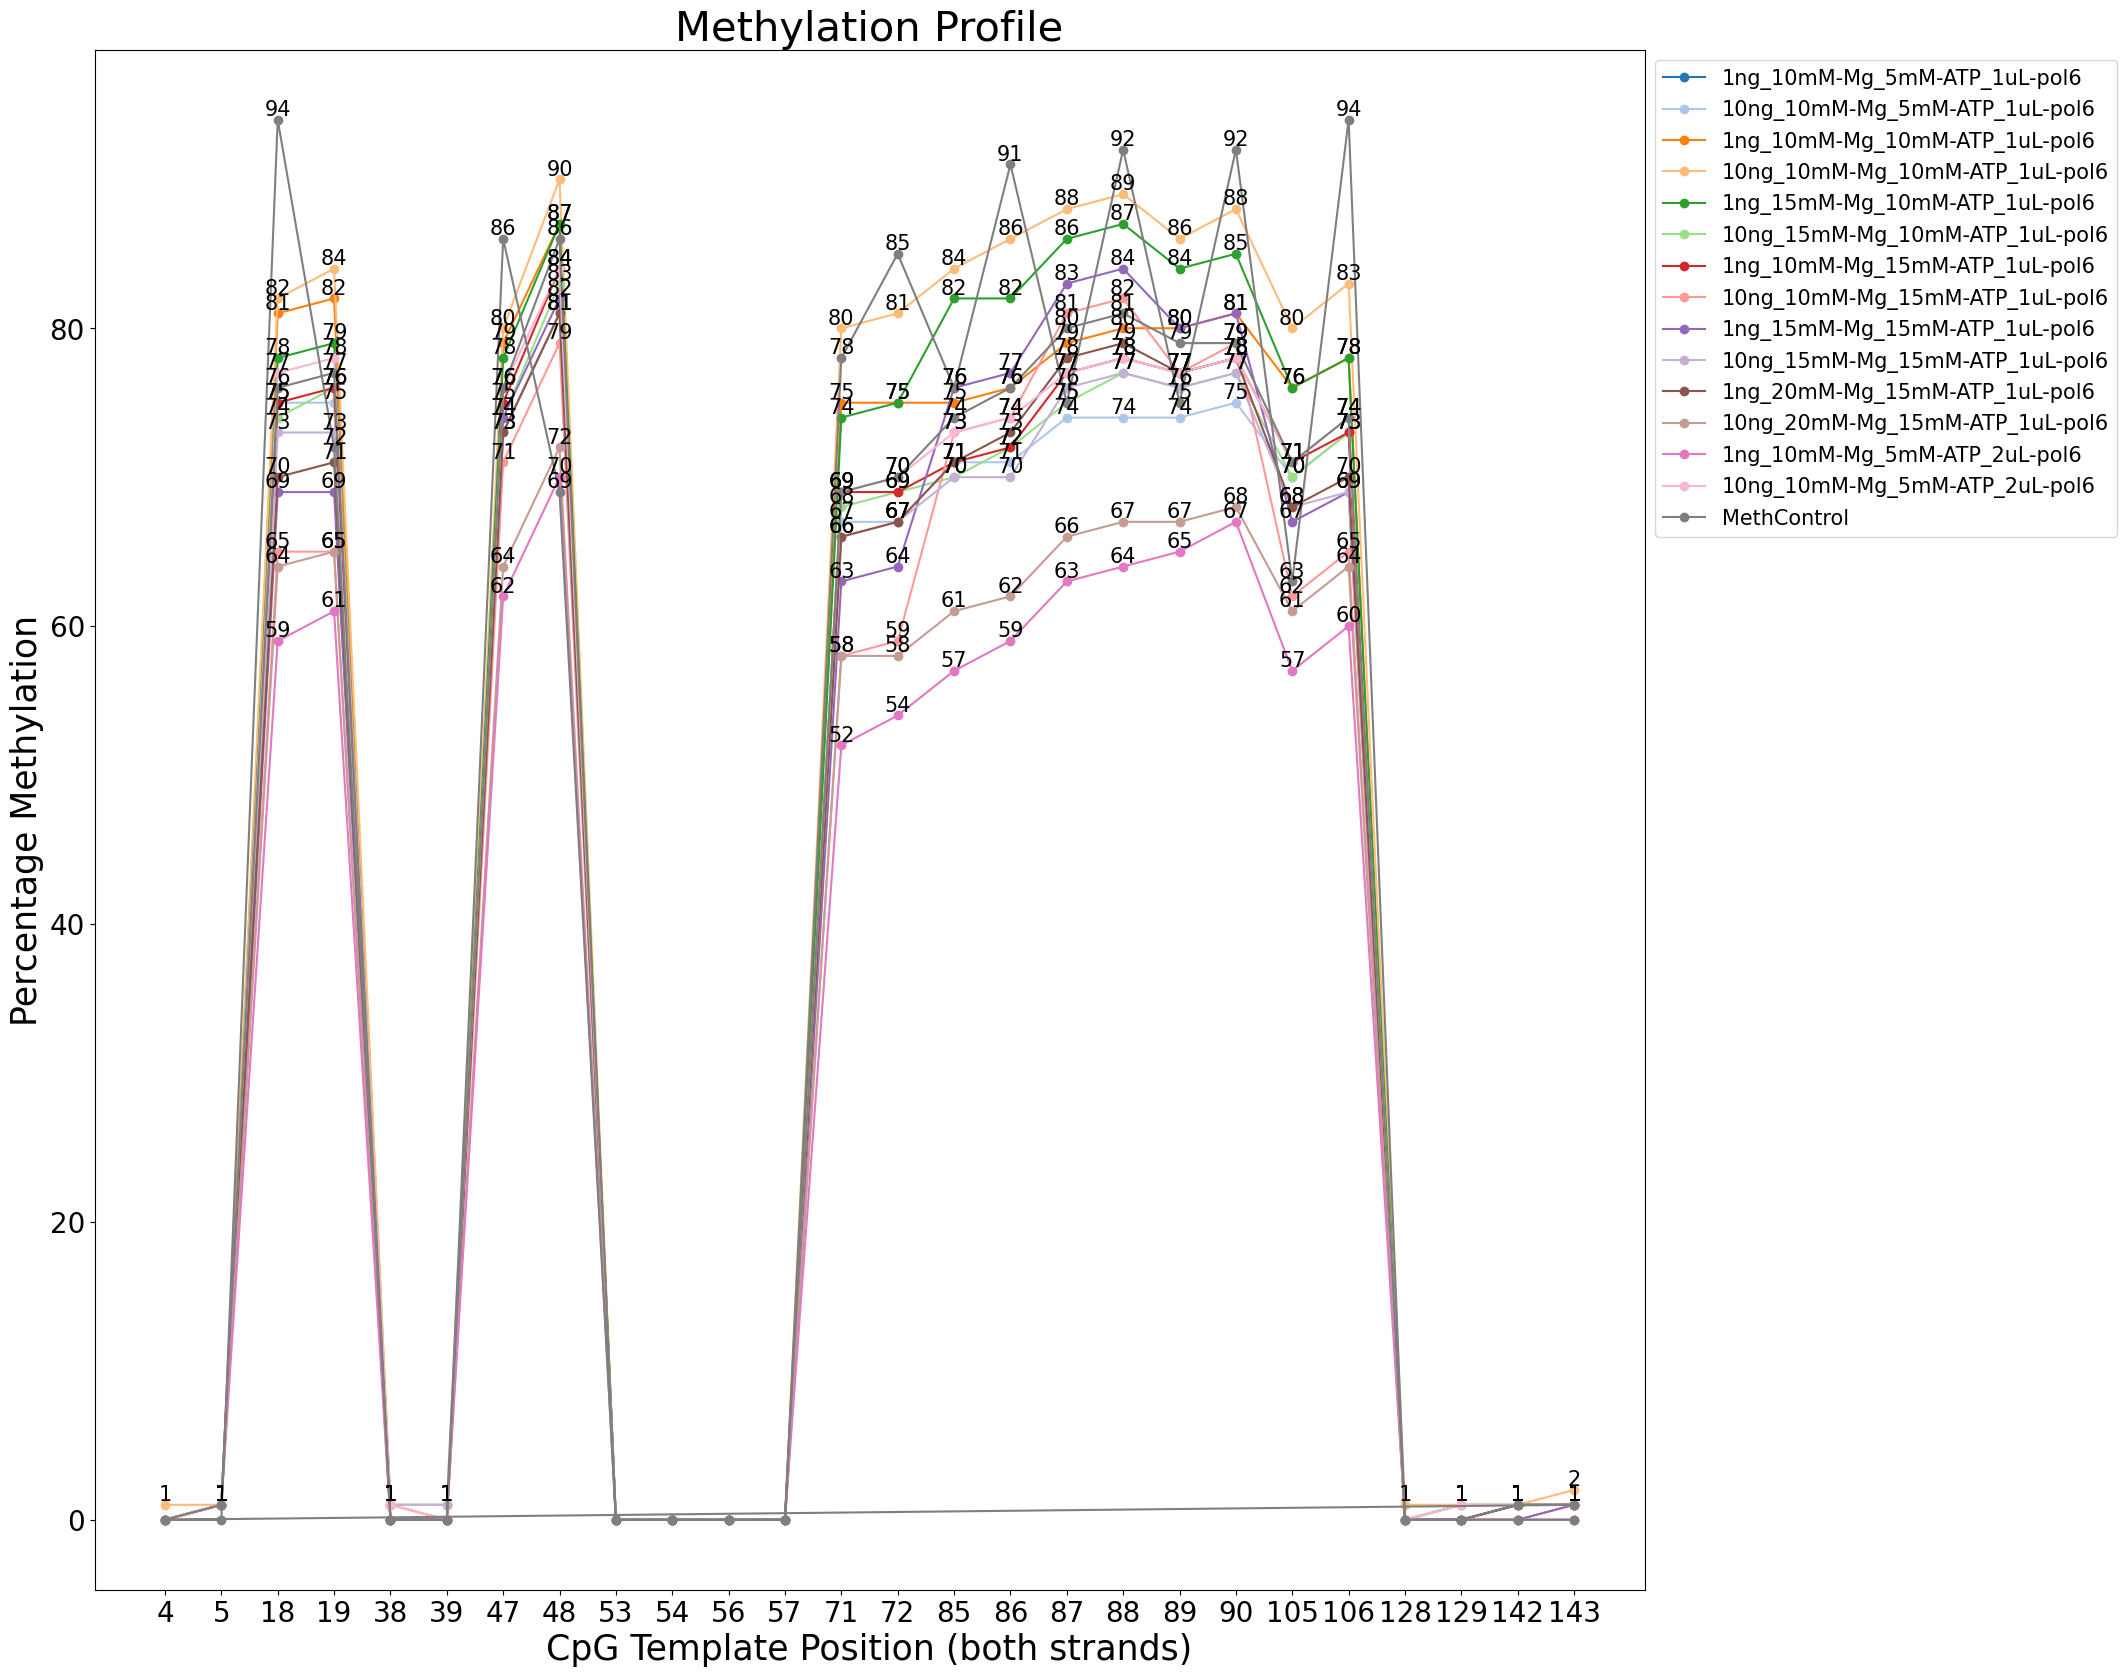

Plots have been generated and saved as Combined_Methylation_Profile_Labelled.png.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique sorted start positions and convert them to integers and then to strings for categorical plotting
unique_starts = df['start'].unique().astype(str)

# Group data by 'filename'
grouped = df.groupby('filename')

# Create a new figure
plt.figure(figsize=(20, 20))

# Define colors for different groups using the updated method
colormap = plt.get_cmap('tab20')
colors = [colormap(i) for i in range(len(grouped))]

# Calculate the positions for the lines on the x-axis
x_positions = np.arange(len(unique_starts))

# Plot each group
for i, (filename, group) in enumerate(grouped):
    # Get the indices for the x positions based on the unique start positions
    indices = [np.where(unique_starts == str(start))[0][0] for start in group['start']]
    # Plot the line
    plt.plot(indices, group['pct_methylation'], marker='o', label=filename, color=colors[i])

    for j, idx in enumerate(indices):
        height = group['pct_methylation'].iloc[j]
        start_pos = group['start'].iloc[j]
        # Add the percentage text without decimal points
        if height > 0:
            plt.text(
                idx,
                height,
                f'{int(height)}',  # Convert height to an integer for no decimal points
                ha='center',
                va='bottom',
                size=15
            )

# Add vertical lines to separate each start position
# Commented out vertical lines for clarity with line plots
#for pos in x_positions:
#    plt.axvline(x=pos - .25 + bar_width, color='gray', linestyle='-.', linewidth=1)  # Adjusting position of vertical lines

# Add title and labels with larger font sizes
plt.title('Methylation Profile', fontsize=30)
plt.xlabel('CpG Template Position (both strands)', fontsize=25)
plt.ylabel('Percentage Methylation', fontsize=25)

# Set x-axis ticks as integers and adjust fontsize
plt.xticks(x_positions, unique_starts, rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Place legend outside the plot with larger font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)

# Save the plot as an image file
plt.savefig('Combined_Methylation_Profile_Labelled.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Combined_Methylation_Profile_Labelled.png.")


In [ ]:
# Get unique sorted start positions and convert them to integers and then to strings for categorical plotting
unique_starts = df['start'].unique().astype(str)

# Group data by 'filename'
grouped = df.groupby('filename')

# Create a new figure
plt.figure(figsize=(20, 20))

# Define colors for different groups using the updated method
colormap = plt.get_cmap('tab20')
colors = [colormap(i) for i in range(len(grouped))]

# Set the bar width and the spacing between group sets
bar_width = 0.1
spacing_between_groups = .00002

# Calculate the positions for the bars on the x-axis
x_positions = np.arange(len(unique_starts)) * (1 + spacing_between_groups)

# Number of groups
num_groups = len(grouped)

# Plot each group
for i, (filename, group) in enumerate(grouped):
    # Get the indices for the x positions based on the unique start positions
    indices = [np.where(unique_starts == str(start))[0][0] for start in group['start']]
    # Centering the bars by shifting them left by half of total bar width and adding spacing
    shifted_indices = [x + (i - num_groups / 2) * bar_width for x in indices]
    bars = plt.bar(shifted_indices, group['pct_methylation'], width=bar_width, label=filename, color=colors[i])

    for j, bar in enumerate(bars):
        height = bar.get_height()
        start_pos = group['start'].iloc[j]
        # Add the percentage text without decimal points
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{int(height)}',  # Convert height to an integer for no decimal points
                ha='center',
                va='bottom',
                size=15
        )

# Add vertical lines to separate each start position
#for pos in x_positions:
#    plt.axvline(x=pos - .25 + bar_width, color='gray', linestyle='-.', linewidth=1)  # Adjusting position of vertical lines

# Add title and labels with larger font sizes
plt.title('Methylation Profile', fontsize=30)
plt.xlabel('CpG Template Position (both strands)', fontsize=25)
plt.ylabel('Percentage Methylation', fontsize=25)

# Set x-axis ticks as integers and adjust fontsize
plt.xticks(x_positions, unique_starts, rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Place legend outside the plot with larger font size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)

# Save the plot as an image file
plt.savefig('Combined_Methylation_Profile_Labelled.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Combined_Methylation_Profile_Labelled.png.")

In [ ]:
# Filter the DataFrame to include only rows with 'pct_methylation' greater than 3
df_avg = df[df['pct_methylation'] > 3]

In [ ]:
df_avg

In [ ]:
df_avg.drop(df_avg[df_avg['pct_methylation'] == 0].index, inplace=True)

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('up.csv')

In [ ]:
df.loc[df['filename'] == 'TemplateMeth', 'filename'] = 'TemplateMethControl'
df.loc[df['filename'] == 'TemplateUnMeth', 'filename'] = 'TemplateUnMethControl'

In [ ]:
# Group by 'filename' and calculate the average 'pct_methylation' for each group
df_avg = df_avg.groupby('filename', as_index=False)['pct_methylation'].mean()

# Sort the DataFrame by 'filename'
df_avg = df_avg.sort_values(by='filename')

df_avg['pct_methylation'] = df_avg.pct_methylation.fillna(0)

In [ ]:
# Define custom order list for filenames
custom_dict = {
                '39C_+SAM_-ATP_+DNMT5_14mMMgOAc': 0, 
    '35C_+SAM_-ATP_+DNMT5_14mMMgOAc':1,
       '30C_+SAM_-ATP_+DNMT5_14mMMgOAc':2,
    '39C_+SAM_10mMATP_+DNMT5_14mMMgOAc':3,
       '35C_+SAM_10mMATP_+DNMT5_14mMMgOAc':4,
       '30C_+SAM_10mMATP_+DNMT5_14mMMgOAc':5,
    '39C_+SAM_10mMATP_+DNMT5_24mMMgOAc':6,
       '30C_+SAM_10mMATP_+DNMT5_24mMMgOAc':7, 'TemplateMethControl':8,
       'TemplateUnMethControl':9}  # Replace with your custom order

In [ ]:
df_avg['filename']

In [ ]:
def label_race(row):
   if row['filename'] == '39C_+SAM_-ATP_+DNMT5_14mMMgOAc' || row['filename'] =='35C_+SAM_-ATP_+DNMT5_14mMMgOAc'||row['filename'] == '30C_+SAM_-ATP_+DNMT5_14mMMgOAc':
      return 'group_one'
   else return 'Other'

In [ ]:
df_avg = df_avg.sort_values(by=['filename'], key=lambda x: x.map(custom_dict))

In [ ]:
labels = ['39C\n+SAM\n-ATP\n+DNMT5\n14mMMgOAc',
       '35C\n+SAM\n-ATP\n+DNMT5\n14mMMgOAc',
       '30C\n+SAM\n-ATP\n+DNMT5\n14mMMgOAc',
          '39C\n+SAM\n10mMATP\n+DNMT5\n14mMMgOAc',
       '35C\n+SAM\n10mMATP\n+DNMT5\n14mMMgOAc',
       '30C\n+SAM\n10mMATP\n+DNMT5\n14mMMgOAc',
          '39C\n+SAM\n10mMATP\n+DNMT5\n24mMMgOAc',
       '30C\n+SAM\n10mMATP\n+DNMT5\n24mMMgOAc', 'TemplateMeth\nControl',
       'TemplateUnMeth\nControl']

In [ ]:
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_5mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_5mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_10mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_10mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_15mM-Mg_10mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_15mM-Mg_10mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_15mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_15mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_20mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_20mM-Mg_15mM-ATP_1uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_5mM-ATP_2uL-pol6','hatch'] = 0
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_5mM-ATP_2uL-pol6','hatch'] = 1
df_avg.loc[df_avg['filename'] == 'MethControl','hatch'] = 0

In [ ]:
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_5mM-ATP_1uL-pol6','label'] = 1
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_5mM-ATP_1uL-pol6','label'] = 1
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_10mM-ATP_1uL-pol6','label'] = 3
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_10mM-ATP_1uL-pol6','label'] = 3
df_avg.loc[df_avg['filename'] == '1ng_15mM-Mg_10mM-ATP_1uL-pol6','label'] = 4
df_avg.loc[df_avg['filename'] == '10ng_15mM-Mg_10mM-ATP_1uL-pol6','label'] = 4
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_15mM-ATP_1uL-pol6','label'] = 5
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_15mM-ATP_1uL-pol6','label'] = 5
df_avg.loc[df_avg['filename'] == '1ng_15mM-Mg_15mM-ATP_1uL-pol6','label'] = 6
df_avg.loc[df_avg['filename'] == '10ng_15mM-Mg_15mM-ATP_1uL-pol6','label'] = 6
df_avg.loc[df_avg['filename'] == '1ng_20mM-Mg_15mM-ATP_1uL-pol6','label'] = 7
df_avg.loc[df_avg['filename'] == '10ng_20mM-Mg_15mM-ATP_1uL-pol6','label'] = 7
df_avg.loc[df_avg['filename'] == '1ng_10mM-Mg_5mM-ATP_2uL-pol6','label'] = 8
df_avg.loc[df_avg['filename'] == '10ng_10mM-Mg_5mM-ATP_2uL-pol6','label'] = 8
df_avg.loc[df_avg['filename'] == 'MethControl','label'] = 9


In [ ]:
df_avg

In [ ]:
# Plotting the average pct_methylation for each filename
plt.figure(figsize=(13, 7))

# Define colors
colormap = plt.get_cmap('tab20b')
colors = [{l==1:'red', l==2: 'orange', l==3: 'green', l==4:'blue', l==5:'purple'}[True] for l in df_avg['label']]

# Set the bar width
bar_width = 0.5

# Calculate the positions for the bars on the x-axis
x_positions = np.arange(len(df_avg))

# Plot each group
bars = plt.bar(x_positions, df_avg['pct_methylation'], width=bar_width, color=colors)

# Add the percentage text without decimal points
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Convert height to an integer for no decimal points
        ha='center',
        va='bottom',
        size=12
    )

# Add title and labels with larger font sizes
plt.title('Average Methylation Profile for 5mC Sites per Condition', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Average Percentage Methylation', fontsize=15)

# Set x-axis ticks and labels
plt.xticks(x_positions, custom_order, rotation=0, fontsize=8)
plt.yticks(fontsize=12)

# Save the plot as an image file
plt.savefig('Average_Methylation_Profile.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Average_Methylation_Profile.png.")

In [ ]:
from matplotlib.patches import Ellipse, Polygon
import matplotlib.pyplot as plt
import numpy as np

def plot_methylation_profile(df_avg, custom_order, hatched_conditions):
    # Plotting the average pct_methylation for each filename
    fig = plt.figure(figsize=(13, 7))

    # Define colors
    colormap = plt.get_cmap('tab20b')
    colors = [{l==1:'red', 
               l==2:'#a70100',
               l==3: 'orange', 
               l==4: '#c68000',
               l==5: '#0fbe00', 
               l==6: 'green',
               l==7: '#22581e',
               l==8: 'blue',
               l==9:'purple', 
               l==10:'purple',
               l==11:'grey'
              }[True] for l in df_avg['label']]

    # Set the bar width
    bar_width = 0.5

    # Calculate the positions for the bars on the x-axis
    x_positions = np.arange(len(df_avg))

    # Plot each group
    bars = plt.bar(x_positions, df_avg['pct_methylation'], width=bar_width, color=colors)

    # Apply hatches to specified conditions
    for bar, condition in zip(bars, df_avg['hatch']):
        if condition == 1:
            bar.set_hatch('\\//')

    # Add the percentage text without decimal points
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',  # Convert height to an integer for no decimal points
            ha='center',
            va='bottom',
            size=12
        )

    # Add title and labels with larger font sizes
    plt.title('Average Methylation Profile for 5mC Sites per Condition', fontsize=20)
    plt.xlabel('Condition', fontsize=15)
    plt.ylabel('Average Percentage Methylation', fontsize=15)

    # Set x-axis ticks and labels
    plt.xticks(x_positions, custom_order, rotation=0, fontsize=8)
    plt.yticks(fontsize=12)

    # Save the plot as an image file
    plt.savefig('Average_Methylation_Profile.png')

    # Show the plot
    plt.show()

    print("Plots have been generated and saved as Average_Methylation_Profile.png.")

# Example usage
# df_avg should be your dataframe containing the necessary data
# custom_order should be the labels of the x-axis in the required order
# hatched_conditions should be the list of conditions you want to have hatches
hatched_conditions = [1, 3, 5, 7, 9, 11, 13]  # Example conditions to be hatched
plot_methylation_profile(df_avg, custom_order, hatched_conditions)


In [ ]:
# Define custom order list for filenames
custom_order = ['1ng\n10mM Mg\n5mM ATP\n1uL pol6', 
                '10ng\n10mM Mg\n5mM ATP\n1uL pol6', 
                '1ng\n10mM Mg\n10mM ATP\n1uL pol6', 
                '10ng\n10mM Mg\n10mM ATP\n1uL pol6', 
                '1ng\n15mM Mg\n10mM ATP\n1uL pol6', 
                '10ng\n15mM Mg\n10mM ATP\n1uL pol6',
                '1ng\n10mM Mg\n15mM ATP\n1uL pol6', 
                '10ng\n10mM Mg\n15mM ATP\n1uL pol6', 
                '1ng\n15mM Mg\n15mM ATP\n1uL pol6',  
                '10ng\n15mM Mg\n15mM ATP\n1uL pol6', 
                '1ng\n20mM Mg\n15mM ATP\n1uL pol6', 
                '10ng\n20mM Mg\n15mM ATP\n1uL pol6',
                '1ng\n10mM Mg\n5mM ATP\n2uL pol6', 
                '10ng\n10mM Mg\n5mM ATP\n2uL pol6', 
                'MethControl']  # Replace with your custom order

In [ ]:
# Plotting the average pct_methylation for each filename
plt.figure(figsize=(10, 7))

# Define colors
colormap = plt.get_cmap('tab20b')
colors = [colormap(i) for i in range(len(df_avg))]

# Set the bar width
bar_width = 0.5

# Calculate the positions for the bars on the x-axis
x_positions = np.arange(len(df_avg))

# Plot each group
bars = plt.bar(x_positions, df_avg['pct_methylation'], width=bar_width, color=colors)

# Add the percentage text without decimal points
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Convert height to an integer for no decimal points
        ha='center',
        va='bottom',
        size=12
    )

# Add title and labels with larger font sizes
plt.title('Average Methylation Profile for 5mC Sites per Condition', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Average Percentage Methylation', fontsize=15)

# Set x-axis ticks and labels
plt.xticks(x_positions, labels, rotation=0, fontsize=8)
plt.yticks(fontsize=12)

# Save the plot as an image file
plt.savefig('Average_Methylation_Profile.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as Average_Methylation_Profile.png.")

In [ ]:
# Group by 'filename' and calculate the average 'pct_methylation' for each group
df_avg = df.groupby('filename', as_index=False)['num_alignment_methylated'].mean()

# Sort the DataFrame by 'filename'
df_avg = df_avg.sort_values(by='filename')

df_avg['num_alignment_methylated'] = df_avg.num_alignment_methylated.fillna(0)

In [ ]:
df_avg = df_avg[~df_avg['filename'].isin(custom_order)]

In [ ]:
# Plotting the average pct_methylation for each filename
plt.figure(figsize=(10, 7))

# Define colors
colormap = plt.get_cmap('tab20b')
colors = [colormap(i) for i in range(len(df_avg))]

# Set the bar width
bar_width = 0.5

# Calculate the positions for the bars on the x-axis
x_positions = np.arange(len(df_avg))

# Plot each group
bars = plt.bar(x_positions, df_avg['num_alignment_methylated'], width=bar_width, color=colors)

# Add the percentage text without decimal points
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{int(height)}',  # Convert height to an integer for no decimal points
        ha='center',
        va='bottom',
        size=12
    )

# Add title and labels with larger font sizes
plt.title('num_alignment_methylated', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('num_alignment_methylated', fontsize=15)

# Set x-axis ticks and labels
plt.xticks(x_positions, df_avg['filename'], rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as an image file
plt.savefig('num_alignment_methylated.png')

# Show the plot
plt.show()

print("Plots have been generated and saved as num_alignment_methylated.")

In [ ]:
new_row = {'filename': "2_No-Meth_10mM-Mg_5mM-ATP_1uL-pol6",
           'chrom': "Flankseq",
           "start": 0,
           "end": 0,
           "pct_methylation": 0,
           "num_alignment_methylated": 0,
           "num_alignment_unmethylated": 0}

In [ ]:
df = df.append(new_row, ignore_index=True)

In [ ]:
df_demux = pd.read_csv('Demultiplex_Stats.csv')


In [ ]:
# Plotting the data
plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size
plt.bar(df_demux['SampleID'], df_demux['# Reads'])

# Adding titles and labels
plt.title('SampleID vs. # Reads')
plt.xlabel('Sample ID')
plt.ylabel('# Reads')

plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=12)

# Displaying the plot
plt.show()

In [ ]:
df_demux